In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import get_q1_data
%matplotlib inline
plt.rcParams['figure.figsize'] = 8,8

In [2]:
X_train, X_test, y_train, y_test, le = get_q1_data()
print("%d training samples, %d test samples"%(X_train.shape[0], X_test.shape[0]))
print("classes:", le.classes_)
print("The first 10 training samples are (with bias):")
print(X_train[:10])

70 training samples, 30 test samples
classes: [b'Iris-versicolor' b'Iris-virginica']
The first 10 training samples are (with bias):
[[1.  5.6 3.  4.1 1.3]
 [1.  5.5 2.5 4.  1.3]
 [1.  5.5 2.6 4.4 1.2]
 [1.  6.1 3.  4.6 1.4]
 [1.  5.8 2.6 4.  1.2]
 [1.  5.  2.3 3.3 1. ]
 [1.  5.6 2.7 4.2 1.3]
 [1.  5.7 3.  4.2 1.2]
 [1.  5.7 2.9 4.2 1.3]
 [1.  6.2 2.9 4.3 1.3]]


In [4]:
len(X_test)

30

### 1. Implement sigmoid function
\begin{align}
sigmoid(x) & = \frac{1}{1+e^{-x}} \\
\end{align}
<img src="Figures/logistic.png">

In [3]:
def sigmoid(x):
    ### TODO: Fill this function with your implementation of sigmoid function ####
    return 1/(1+np.exp(-x)) 

### 2. Implement cross entropy
For binary classification for all samples with the output vector o and target label t $\in \{0, 1\}$:
\begin{align}
L(o, t) & = - \sum_{i=1}^n(t^{(i)}log(o^{(i)}) + (1-t^{i})log(1-o^{i})) \\
\end{align}

In [4]:
def crossentropy(o,t):
    ### o is the output, t is the target.
    ### TODO: Fill this function with your implementation of crossentropy function for all samples ####
    return -np.sum(t*np.log(o)+(1-t)*np.log(1-o))

### 3. Initialize weights
For weight initialization, please refer to http://cs231n.github.io/neural-networks-2/#init.

Here we are building a feed forward neural network with 2 hidden units as shown below. 
<img src="Figures/nn.png">

In [9]:
J = 2 # number of hidden units
### TODO: Fill the information for weight initialization ###
w1 = np.random.random((X_train.shape[1],J))-0.5 # initialize weights with calibration between input and hidden layer.
w2 = np.random.random((J+1,1))-0.5 # initialize weights with calibration between hidden and output layer.
n_iter = 10000 # can be modified
alpha = 2e-3 # can be modified
train_err = []
test_err = []
dw1_ = []
train_loss = []

### 4. Implement gradient descent for n iterations.
Implement the update dw1 and dw2 based on your derivations for \begin{align}
\frac{\delta L}{\delta w_2}, 
\frac{\delta L}{\delta w_1}
\end{align}

In [10]:
### TODO: Fill the blanks below for gradient descent ###
for n in range(n_iter):
    # forward computation
    a = np.dot(X_train,w1)
    z = sigmoid(a)
    z_bias = np.hstack((np.ones((z.shape[0],1)),z))
    output = sigmoid(np.dot(z_bias,w2))
    # backward computation to calculate dw1 and dw2
    delta_k = y_train-output
    dw2 = np.dot(z_bias.T,delta_k)
    grad_sigmoid = np.multiply(1-z,z)
    delta_j = np.multiply(grad_sigmoid,np.dot(delta_k,w2[1:].T))
    dw1 = np.dot(X_train.T,delta_j)
    # weight updating
    w1 = w1 + alpha*dw1
    w2 = w2 + alpha*dw2
    # training error
    y_predict = np.greater_equal(output,0.5).astype(int)
    train_err.append(np.sum(np.not_equal(y_predict-y_train,0).astype(int))/len(X_train)) # calculate the error and append to train_err
    # training loss
    train_loss.append(crossentropy(output,y_train)) # use your crossentropy to calculate the loss
    # test error
    a = np.dot(X_test,w1)
    z = sigmoid(a)
    z_bias = np.hstack((np.ones((z.shape[0],1)),z))
    output = sigmoid(np.dot(z_bias,w2))
    y_predict = np.greater_equal(output,0.5).astype(int)
    test_err.append(np.sum(np.not_equal(y_test-y_predict,0).astype(int))/len(X_test))

### 5. Print training loss vs number of iterations

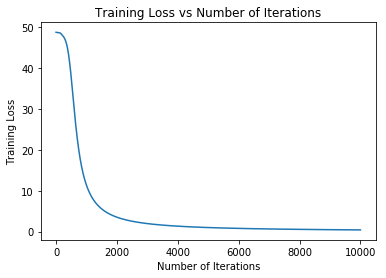

In [11]:
plt.figure()
plt.title("Training Loss vs Number of Iterations")
plt.plot(train_loss)
plt.ylabel("Training Loss")
plt.xlabel("Number of Iterations")
plt.show()

### 6. Print training error and test error

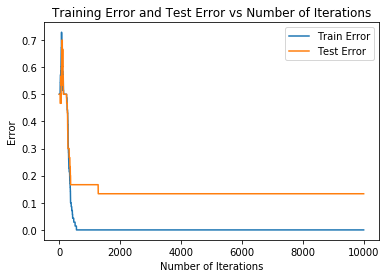

In [12]:
plt.figure()
plt.title("Training Error and Test Error vs Number of Iterations")
plt.plot(train_err)
plt.plot(test_err)
plt.ylabel("Error")
plt.xlabel("Number of Iterations")
plt.legend(["Train Error","Test Error"])
plt.show()

In [15]:
train_loss[-1]

0.4226336107798739

In [13]:
train_err[-1]

0.0

In [14]:
test_err[-1]

0.13333333333333333